# Emprical Investigation into GOSDT Runtime and Performance with the GOSDT Python Library

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import gosdt

## Load Wine Dataset

In [2]:

# Load the dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Optional: shuffle and split
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Dataset Size

In [ ]:
sample_sizes = [100, 500, 1000, 2000, 4000, 8000]
runtimes, accuracies, leaves = [], [], []

for size in sample_sizes:
    X_sub, y_sub = X_train.iloc[:size], y_train.iloc[:size]

    config = {
        "regularization": 0.05,
        "depth_budget": 10,
        "time_limit": 500
    }

    model = gosdt.GOSDT(config)

    start = time.time()
    model.fit(X_sub, y_sub)
    end = time.time()

    preds       = model.predict(X_test)
    acc         = accuracy_score(y_test, preds)
    leaf_count  = model.tree.leaves()
    elapsed     = end - start     

    runtimes.append(elapsed)
    accuracies.append(acc)
    leaves.append(leaf_count)

    print(f"Size {size}: {elapsed:.2f}s, Acc={acc:.3f}, Leaves={leaf_count}")

# Plot runtime, accuracy, and leaves
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
axs[0].plot(sample_sizes, runtimes, marker='o')
axs[0].set_title("Runtime vs Sample Size")
axs[0].set_ylabel("Seconds")

axs[1].plot(sample_sizes, accuracies, marker='o')
axs[1].set_title("Accuracy vs Sample Size")
axs[1].set_ylabel("Accuracy")

axs[2].plot(sample_sizes, leaves, marker='o')
axs[2].set_title("Leaf Count vs Sample Size")
axs[2].set_ylabel("Number of Leaves")
axs[2].set_xlabel("Sample Size")

plt.tight_layout()
plt.show()


## Regularization

gosdt reported successful execution
training completed. 0.000/0.000/102.905 (user, system, wall), mem=0 MB
bounds: [0.080000..0.080000] (0.000000) loss=0.000000, iterations=399505
λ=0.02: 103.61s, Acc=0.889, Leaves=4
gosdt reported successful execution
training completed. 0.000/0.000/73.476 (user, system, wall), mem=0 MB
bounds: [0.200000..0.200000] (0.000000) loss=0.000000, iterations=323225
λ=0.05: 74.09s, Acc=0.917, Leaves=4
gosdt reported successful execution
training completed. 0.000/0.000/30.721 (user, system, wall), mem=0 MB
bounds: [0.360000..0.360000] (0.000000) loss=0.060000, iterations=161656
λ=0.10: 30.86s, Acc=0.889, Leaves=3
gosdt reported successful execution
training completed. 0.000/0.000/0.097 (user, system, wall), mem=0 MB
bounds: [0.660000..0.660000] (0.000000) loss=0.060000, iterations=629
λ=0.20: 0.10s, Acc=0.889, Leaves=3
gosdt reported successful execution
training completed. 0.000/0.000/0.000 (user, system, wall), mem=0 MB
bounds: [0.880000..0.880000] (0.000000

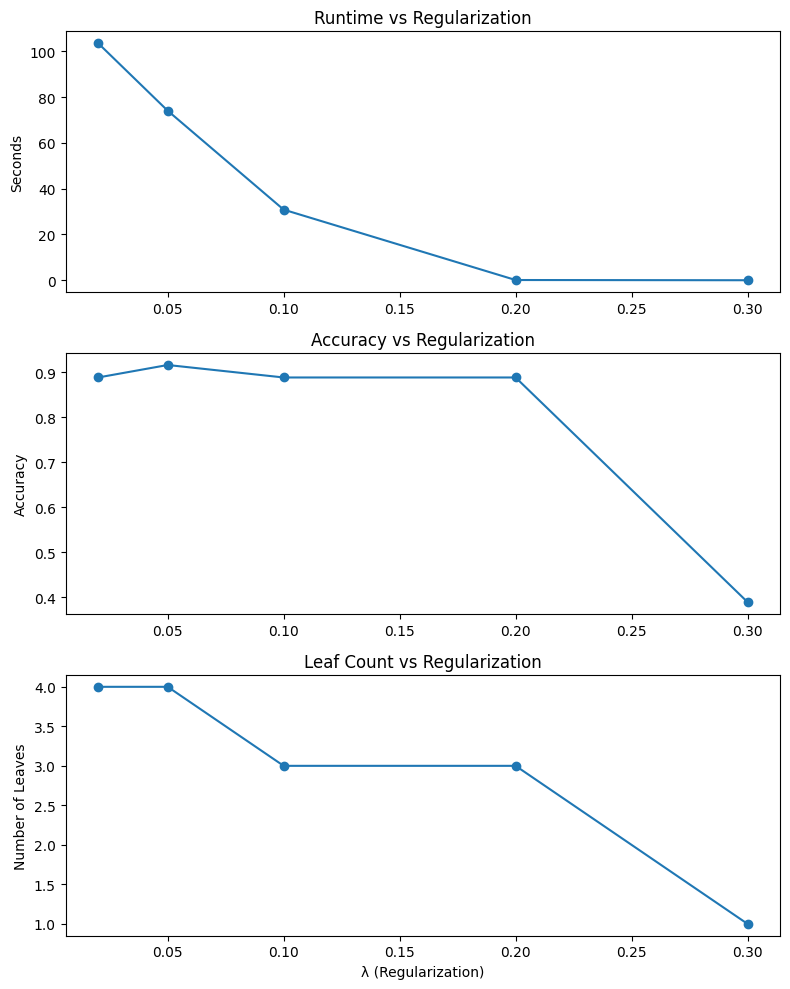

In [3]:
regularization_vals = [0.02, 0.05, 0.1, 0.2, 0.3]
runtimes, accuracies, leaves = [], [], []

X_sub, y_sub = X_train.iloc[:50], y_train.iloc[:50]

for reg in regularization_vals:
    config = {
        "regularization": reg,
        "depth_budget": 4,
        "time_limit": 500
    }

    model = gosdt.GOSDT(config)
    start = time.time()
    model.fit(X_sub, y_sub)
    end = time.time()

    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    leaf_count = model.tree.leaves()

    runtimes.append(end - start)
    accuracies.append(acc)
    leaves.append(leaf_count)

    print(f"λ={reg:.2f}: {end - start:.2f}s, Acc={acc:.3f}, Leaves={leaf_count}")

# Plot
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
axs[0].plot(regularization_vals, runtimes, marker='o')
axs[0].set_title("Runtime vs Regularization")
axs[0].set_ylabel("Seconds")

axs[1].plot(regularization_vals, accuracies, marker='o')
axs[1].set_title("Accuracy vs Regularization")
axs[1].set_ylabel("Accuracy")

axs[2].plot(regularization_vals, leaves, marker='o')
axs[2].set_title("Leaf Count vs Regularization")
axs[2].set_ylabel("Number of Leaves")
axs[2].set_xlabel("λ (Regularization)")

plt.tight_layout()
plt.show()


## Max Depth

gosdt reported successful execution
training completed. 0.000/0.000/0.014 (user, system, wall), mem=0 MB
bounds: [0.283516..0.283516] (0.000000) loss=0.083516, iterations=0
Depth 2: 0.77s, Acc=0.930, Leaves=2
gosdt reported successful execution
training completed. 0.000/0.000/0.013 (user, system, wall), mem=0 MB
bounds: [0.283516..0.283516] (0.000000) loss=0.083516, iterations=0
Depth 3: 0.76s, Acc=0.930, Leaves=2
gosdt reported successful execution
training completed. 0.000/0.000/0.014 (user, system, wall), mem=0 MB
bounds: [0.283516..0.283516] (0.000000) loss=0.083516, iterations=0
Depth 4: 0.77s, Acc=0.930, Leaves=2
gosdt reported successful execution
training completed. 0.000/0.000/0.015 (user, system, wall), mem=0 MB
bounds: [0.283516..0.283516] (0.000000) loss=0.083516, iterations=0
Depth 5: 0.75s, Acc=0.930, Leaves=2
gosdt reported successful execution
training completed. 0.000/0.000/0.013 (user, system, wall), mem=0 MB
bounds: [0.283516..0.283516] (0.000000) loss=0.083516, iter

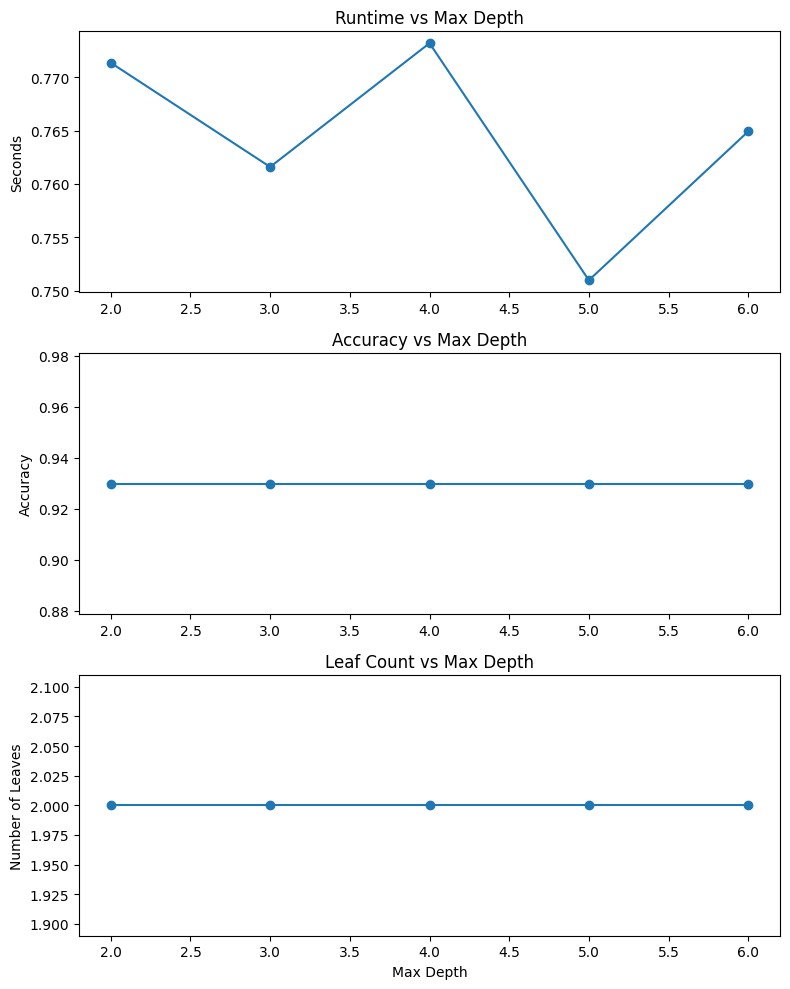

In [ ]:
depth_vals = [2, 3, 4, 5, 6]
runtimes, accuracies, leaves = [], [], []

for depth in depth_vals:
    config = {
        "regularization": 0.05,
        "depth_budget": depth,
        "time_limit": 500
    }

    model = gosdt.GOSDT(config)
    start = time.time()
    model.fit(X_sub, y_sub)
    end = time.time()

    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    leaf_count = model.tree.leaves()

    runtimes.append(end - start)
    accuracies.append(acc)
    leaves.append(leaf_count)

    print(f"Depth {depth}: {end - start:.2f}s, Acc={acc:.3f}, Leaves={leaf_count}")

# Plot
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
axs[0].plot(depth_vals, runtimes, marker='o')
axs[0].set_title("Runtime vs Max Depth")
axs[0].set_ylabel("Seconds")

axs[1].plot(depth_vals, accuracies, marker='o')
axs[1].set_title("Accuracy vs Max Depth")
axs[1].set_ylabel("Accuracy")

axs[2].plot(depth_vals, leaves, marker='o')
axs[2].set_title("Leaf Count vs Max Depth")
axs[2].set_ylabel("Number of Leaves")
axs[2].set_xlabel("Max Depth")

plt.tight_layout()
plt.show()
